In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

/Users/manishanker.talusani/Documents/work/karlos/10 april 2020/.venv_karlos_3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


In [2]:
df_weather_1hr = pd.read_csv("weather_data_1hr.csv")

In [3]:
df_weather_24hr = pd.read_csv("weather_data_24hr.csv")

In [4]:
river_data_1hr = pd.read_csv("bandon_river_data_aggregated_by_hour.csv")

In [15]:
time_range = '2020-02-01 00:00:00':'2020-02-02 00:00:00'

# Focusing on hourly data - df_weather_1hr

In [6]:
# time axis is hourly time, where as the target variable is precipitationMM

In [7]:
df_weather_1hr.head()

,loc_id,date,time,isdaytime,tempC,tempF,windspeedMiles,windspeedKmph,winddirdegree,winddir16point,weatherCode,weatherIconUrl,weatherDesc,precipMM,precipInches,humidity,visibilityKm,visibilityMiles,pressureMB,pressureInches,cloudcover,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF
0,1,2008-07-01,0,no,14,57,23,37,176,S,119,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0003_white_cloud.png,Cloudy,0.0,0.0,89,10,6,1009,30,84,14,58,12,54,12,53,37,59,12,53
1,1,2008-07-01,100,no,14,58,24,39,175,S,119,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0003_white_cloud.png,Cloudy,0.0,0.0,90,9,5,1008,30,89,14,58,13,55,12,53,39,63,12,53
2,1,2008-07-01,200,no,14,58,25,41,174,S,302,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0034_cloudy_with_heavy_rain_night.png,Moderate rain,1.4,0.1,92,8,4,1006,30,95,14,58,13,56,12,53,41,67,12,53
3,1,2008-07-01,300,no,14,58,27,43,172,S,302,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0034_cloudy_with_heavy_rain_night.png,Moderate rain,0.7,0.0,94,7,4,1005,30,100,14,58,13,56,12,53,44,70,12,53
4,1,2008-07-01,400,no,14,58,24,39,178,S,302,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0034_cloudy_with_heavy_rain_night.png,Moderate rain,0.7,0.0,95,8,4,1005,30,100,14,58,14,56,12,54,39,63,12,54


In [8]:
df_weather_24hr.head()

,loc_id,date,maxtempC,maxtempF,mintempC,mintempF,avgtempC,avgtempF,totalprecipMM,totalprecipIn,windspeedMiles,windspeedKmph,sunhour,winddirdegree,winddir16point,weatherCode,weatherIconUrl,weatherDesc,humidity,visibilityKm,visibilityMiles,pressureMB,pressureInches,cloudcover,HeatIndexC,HeatIndexF,DewPointC,DewPointF,WindChillC,WindChillF,WindGustMiles,WindGustKmph,FeelsLikeC,FeelsLikeF,sunrise,sunset,moonrise,moonset
0,1,2008-07-01,17,63,13,56,15,59,4.56,0.18,27,43,13.3,187,S,113,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0001_sunny.png,Sunny,85,10,5,1004,30,53,15,59,12,54,13,56,28,46,13,56,05:21 AM,09:57 PM,02:54 AM,09:05 PM
1,1,2008-07-02,16,61,12,54,14,57,5.60,0.22,19,31,10.9,232,SW,119,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0003_white_cloud.png,Cloudy,89,10,5,1003,30,69,14,57,12,54,13,55,15,25,13,55,05:22 AM,09:56 PM,03:55 AM,10:03 PM
2,1,2008-07-03,15,59,10,49,13,55,1.73,0.07,11,18,13.6,267,W,116,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0002_sunny_intervals.png,Partly cloudy,86,10,6,1009,30,32,13,55,10,50,11,52,13,21,11,52,05:23 AM,09:56 PM,05:15 AM,10:42 PM
3,1,2008-07-04,14,57,10,50,12,53,9.32,0.37,26,41,9.7,118,ESE,122,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0004_black_low_cloud.png,Overcast,93,9,5,1008,30,69,12,53,11,51,9,49,24,39,9,49,05:23 AM,09:55 PM,06:44 AM,11:09 PM
4,1,2008-07-05,16,61,13,55,14,58,7.12,0.28,13,21,12.1,141,SE,116,https://cdn.worldweatheronline.net/images/wsymbols01_png_64/wsymbol_0002_sunny_intervals.png,Partly cloudy,91,9,5,998,30,64,14,58,13,55,13,56,13,22,13,56,05:24 AM,09:55 PM,08:14 AM,11:28 PM


In [9]:
river_data_1hr.head()

,ts,value
0,1975-01-01 00:00:00,30.378
1,1975-01-01 01:00:00,30.370
2,1975-01-01 02:00:00,30.362
3,1975-01-01 03:00:00,30.354
4,1975-01-01 04:00:00,30.348


In [10]:
df = df_weather_24hr[["date", "totalprecipMM"]]

In [11]:
def hourly_timestamp_conversion(row):
    return time_conversion[row["time"]]

keys = list(range(0,2400,100))
values = ['0' + str(x) + ':00:00' for x in range(0, 10, 1)] + [str(x) + ':00:00' for x in range(10, 24, 1)]
time_conversion = dict(zip(keys, values))
df_temp = df_weather_1hr[["date", "time", "precipMM"]]

df_temp['hourly_data'] = df_temp.apply(hourly_timestamp_conversion, axis=1)

df_temp['time_stamp'] = df_temp['date'] + " " + df_temp['hourly_data']

df_temp.drop(["date", "time", "hourly_data"], axis=1, inplace=True)

df_temp.info()

# df_temp['time_stamp'] = pd.to_datetime(df_temp['time_stamp'])
df_temp = df_temp.set_index('time_stamp')
df_temp.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103128 entries, 0 to 103127
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   precipMM    103128 non-null  float64
 1   time_stamp  103128 non-null  object 
dtypes: float64(1), object(1)
memory usage: 1.6+ MB


/Users/manishanker.talusani/Documents/work/karlos/10 april 2020/.venv_karlos_3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/manishanker.talusani/Documents/work/karlos/10 april 2020/.venv_karlos_3.7.5/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/manishanker.talusani/Documents/work/karlos/10 april 2020/

,precipMM
time_stamp,
2008-07-01 00:00:00,0.0
2008-07-01 01:00:00,0.0
2008-07-01 02:00:00,1.4
2008-07-01 03:00:00,0.7
2008-07-01 04:00:00,0.7


In [17]:
df_rain_5days_feb = df_temp['2020-02-01 00:00:00':'2020-02-02 00:00:00']
df_rain_5days_feb

,precipMM
time_stamp,
2020-02-01 00:00:00,0.0
2020-02-01 01:00:00,0.0
2020-02-01 02:00:00,0.0
2020-02-01 03:00:00,0.0
2020-02-01 04:00:00,0.0
2020-02-01 05:00:00,0.0
2020-02-01 06:00:00,0.0
2020-02-01 07:00:00,0.0
2020-02-01 08:00:00,0.0


In [18]:
river_data_1hr['ts'] = pd.to_datetime(river_data_1hr['ts'])
river_data_1hr = river_data_1hr.set_index('ts')
river_data_1hr.head()

,value
ts,
1975-01-01 00:00:00,30.378
1975-01-01 01:00:00,30.370
1975-01-01 02:00:00,30.362
1975-01-01 03:00:00,30.354
1975-01-01 04:00:00,30.348


In [20]:
df_river_5days_feb = river_data_1hr['2020-02-01 00:00:00':'2020-02-02 00:00:00']

In [21]:
df_new = pd.concat([df_rain_5days_feb, df_river_5days_feb], join='inner', axis=1)
df_new

,precipMM,value
2020-02-01 00:00:00,0.0,30.556
2020-02-01 01:00:00,0.0,30.571
2020-02-01 02:00:00,0.0,30.577
2020-02-01 03:00:00,0.0,30.574
2020-02-01 04:00:00,0.0,30.566
2020-02-01 05:00:00,0.0,30.554
2020-02-01 06:00:00,0.0,30.542
2020-02-01 07:00:00,0.0,30.521
2020-02-01 08:00:00,0.0,30.499
2020-02-01 09:00:00,0.0,30.480


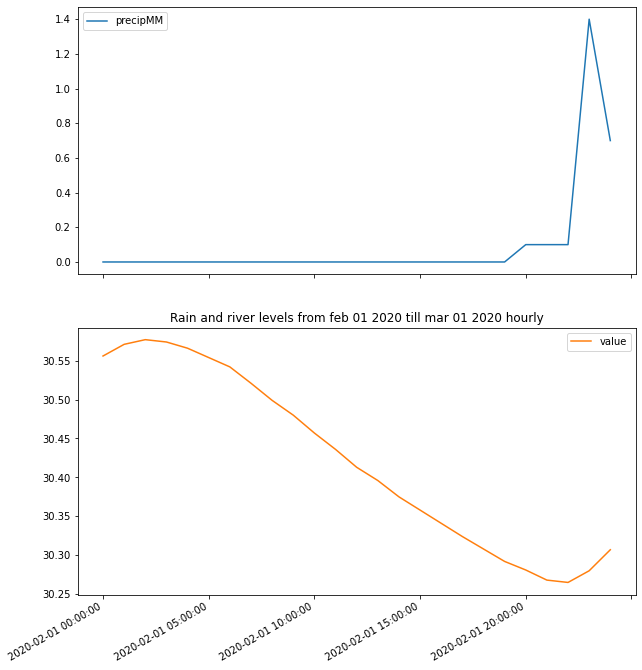

In [22]:
df_new.plot(subplots=True, figsize=(10,12))
plt.title('Rain and river levels from feb 01 2020 till mar 01 2020 hourly')
plt.savefig('rain_river_level.png')
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
df.head()

In [ ]:
df.tail()

In [ ]:
df_rain_jan_march = df['2020-01-01':'2020-03-01']

In [ ]:
df_rain_jan_march.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt  
plt.figure(figsize=(25, 20))  
result = seasonal_decompose(df_rain_jan_march, model='additive')
fig = result.plot()

from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df_rain_jan_march, start_p=1
                            , start_q=1,
                           max_p=4, 
                            max_q=4,
                            m=12,
                           start_P=0,
                            seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

train = df_rain_jan_march.head(int(df_rain_jan_march.shape[0] * 0.85))
test = df_rain_jan_march.tail(int(df_rain_jan_march.shape[0] * 0.15))

stepwise_model.fit(train)

future_forecast = stepwise_model.predict(n_periods=test.shape[0])
# This returns an array of predictions:>>>
print(future_forecast)

future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

### River data 

In [ ]:
river_data_1hr.head()

In [ ]:
river_data_1hr.shape

In [ ]:
df_river = river_data_1hr.asfreq('1D')
df_river

In [ ]:
df_river_jan_march = df_river['2020-01-01':'2020-03-01']

In [ ]:
df_river_jan_march.plot()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt  
plt.figure(figsize=(25, 20))  
result = seasonal_decompose(df_river_jan_march, model='additive')
fig = result.plot()

from pmdarima.arima import auto_arima
stepwise_model = auto_arima(df_river_jan_march, start_p=1
                            , start_q=1,
                           max_p=4, 
                            max_q=4,
                            m=12,
                           start_P=0,
                            seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

train = df_river_jan_march.head(int(df_river_jan_march.shape[0] * 0.85))
test = df_river_jan_march.tail(int(df_river_jan_march.shape[0] * 0.15))

stepwise_model.fit(train)

future_forecast = stepwise_model.predict(n_periods=test.shape[0])
# This returns an array of predictions:>>>
print(future_forecast)

future_forecast = pd.DataFrame(future_forecast, index = test.index, columns=['Prediction'])
pd.concat([test,future_forecast],axis=1).plot()

In [ ]:
df_new = pd.concat([df_river_jan_march, df_rain_jan_march], join='inner', axis=1)
df_new

In [ ]:
df_new.plot(subplots=True, figsize=(10,12))
plt.title('Rain and river levels from jan 2020 till march 2020')
plt.savefig('rain_river_level.png')
plt.show()

Time Series have several key features such as trend, seasonality, and noise.

ARIMA model, which stands for AutoRegressive Integrated Moving Average.

In an ARIMA model there are 3 parameters that are used to help model the major aspects of a times series: seasonality, trend, and noise. These parameters are labeled p,d,and q.

p is the parameter associated with the auto-regressive aspect of the model, which incorporates past values. For example, forecasting that if it rained a lot over the past few days, you state its likely that it will rain tomorrow as well.

d is the parameter associated with the integrated part of the model, which effects the amount of differencing to apply to a time series. You can imagine an example of this as forecasting that the amount of rain tomorrow will be similar to the amount of rain today, if the daily amounts of rain have been similar over the past few days.

q is the parameter associated with the moving average part of the model.

If our model has a seasonal component, we use a seasonal ARIMA model (SARIMA). In that case we have another set of parameters: P,D, and Q which describe the same associations as p,d, and q, but correspond with the seasonal components of the model.